## Module 6 Wrap-up Notebook

In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)

In [3]:
from sklearn.model_selection import cross_validate
result_tree = cross_validate(tree, data, target, cv=10, return_train_score=True)
result_forest = cross_validate(forest, data, target, cv=10, return_train_score=True)

In [4]:
result_tree_df = pd.DataFrame(result_tree)
result_forest_df = pd.DataFrame(result_forest)

In [25]:
tree_win, forest_win = 0, 0
for i in range(0,10):
    if result_tree_df.loc[i, 'test_score'] > result_forest_df.loc[i,'test_score']:
        tree_win = tree_win + 1
    else:
        forest_win = forest_win + 1
print(f"Test scores comparison for Decision Tree Regressor and Random Forest Regressor \n"
      f"Decision Tree Regressor wins {tree_win} times, Random Forest wins {forest_win} times")

Test scores comparison for Decision Tree Regressor and Random Forest Regressor 
Decision Tree Regressor wins 0 times, Random Forest wins 10 times


In [26]:
import helpers.myfunctions as my
my.find_winner(result_tree_df, result_forest_df, 'test_score')

Test scores comparison for First result set and Second result set 
First Result set wins 0 times, Second result set wins 10 times


In [6]:
for i in range(0,10):
    print(f"fold {i},  tree score {result_tree_df.loc[i, 'test_score']}, forest score {result_forest_df.loc[i, 'test_score']}")

fold 0,  tree score 0.596505579544317, forest score 0.7881253335128175
fold 1,  tree score 0.6695771296524032, forest score 0.7743610418370713
fold 2,  tree score 0.7193111982717033, forest score 0.8887139558277576
fold 3,  tree score 0.8184209040231694, forest score 0.8466142701366872
fold 4,  tree score 0.6242817971777523, forest score 0.7804364364679472
fold 5,  tree score 0.7248315652470422, forest score 0.8577146123309887
fold 6,  tree score 0.5309070176706967, forest score 0.7918566232853458
fold 7,  tree score 0.5165539834111661, forest score 0.7354326827908273
fold 8,  tree score 0.584217850287908, forest score 0.7648528131797825
fold 9,  tree score 0.49038086460027, forest score 0.8077531020690433


In [7]:
forest_5 = RandomForestRegressor(n_estimators=5, random_state=0)
result_forest_5 = cross_validate(forest_5, data, target, cv=10, return_train_score=True)
result_forest_5_df = pd.DataFrame(result_forest_5)

In [8]:
forest_100 = RandomForestRegressor(n_estimators=100, random_state=0)
result_forest_100 = cross_validate(forest_100, data, target, cv=10, return_train_score=True)
result_forest_100_df = pd.DataFrame(result_forest_100)

In [9]:
for i in range(0,10):
    print(f"fold {i},  forest 5 trees score {result_forest_5_df.loc[i, 'test_score']}, forest score {result_forest_100_df.loc[i, 'test_score']}")

fold 0,  forest 5 trees score 0.7723518305668596, forest score 0.7881253335128175
fold 1,  forest 5 trees score 0.6580271770320333, forest score 0.7743610418370713
fold 2,  forest 5 trees score 0.8584951905530969, forest score 0.8887139558277576
fold 3,  forest 5 trees score 0.8202906384203124, forest score 0.8466142701366872
fold 4,  forest 5 trees score 0.7892196354569381, forest score 0.7804364364679472
fold 5,  forest 5 trees score 0.8512651261146451, forest score 0.8577146123309887
fold 6,  forest 5 trees score 0.7788118929673208, forest score 0.7918566232853458
fold 7,  forest 5 trees score 0.6144531957900606, forest score 0.7354326827908273
fold 8,  forest 5 trees score 0.7645320537428023, forest score 0.7648528131797825
fold 9,  forest 5 trees score 0.7611933964598083, forest score 0.8077531020690433


In [10]:
forest_5_win, forest_100_win = 0, 0
for i in range(0,10):
    if result_forest_5_df.loc[i, 'test_score'] > result_forest_100_df.loc[i,'test_score']:
        forest_5_win = forest_5_win + 1
    else:
        forest_100_win = forest_100_win + 1
print(f"Test scores comparison for Decision Tree Regressor and Random Forest Regressor \n"
      f"Forest with 5 trees wins {forest_5_win} times, Random Forest 100 trees wins {forest_100_win} times")

Test scores comparison for Decision Tree Regressor and Random Forest Regressor 
Forest with 5 trees wins 1 times, Random Forest 100 trees wins 9 times


In [21]:
my.find_winner(result_forest_5_df, result_forest_100_df, 'test_score')

Test scores comparison for First result set and Second result set 
First Result set wins 1 times, Second result set wins 9 times


In [11]:
# solution
from sklearn.model_selection import validation_curve
forest = RandomForestRegressor(random_state=0)

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

train_scores, test_scores = validation_curve(
    forest,
    data,
    target,
    param_name="n_estimators",
    param_range=param_range,
    n_jobs=2,
)

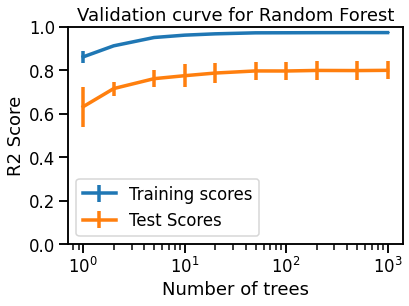

In [36]:
import matplotlib.pyplot as plt

plt.errorbar(
    param_range,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label="Training scores",
)
plt.errorbar(
    param_range,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label="Test Scores",
)
plt.legend()
plt.xscale("log")
plt.xlabel("Number of trees")
plt.ylabel("R2 Score")
plt.ylim([0, 1])
_ = plt.title("Validation curve for Random Forest")

In [13]:
from sklearn.model_selection import validation_curve
forest_d5 = RandomForestRegressor(max_depth=5 ,random_state=0)

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

train_scores_d5, test_scores_d5 = validation_curve(
    forest_d5,
    data,
    target,
    param_name="n_estimators",
    param_range=param_range,
    n_jobs=2,
)

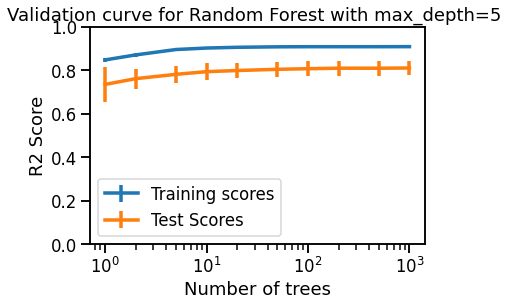

In [35]:
import matplotlib.pyplot as plt

plt.errorbar(
    param_range,
    train_scores_d5.mean(axis=1),
    yerr=train_scores_d5.std(axis=1),
    label="Training scores",
)
plt.errorbar(
    param_range,
    test_scores_d5.mean(axis=1),
    yerr=test_scores_d5.std(axis=1),
    label="Test Scores",
)
plt.legend()
plt.xscale("log")
plt.xlabel("Number of trees")
plt.ylabel("R2 Score")
plt.ylim([0, 1])
_ = plt.title("Validation curve for Random Forest with max_depth=5 ")

In [19]:
def find_winner(result_first, result_second, variable):
    """
    This function compares the test scores of a cross-validation
    fold by fold, summarizes the amount of times the test scores
    were higher.
    input parameters: first data set, second data set, variable to compare 
    (normally 'test_score' for cross-validation) 
    """
    sum_first, sum_second = 0, 0
    for i in range(0, result_first[variable].count()):
        if result_first.loc[i, 'test_score'] > result_second.loc[i,'test_score']:
            sum_first = sum_first + 1
        else:
            sum_second = sum_second + 1
    print(f"Test scores comparison for First result set and Second result set \n"
          f"First Result set wins {sum_first} times, Second result set wins {sum_second} times")

In [27]:
rf_1_tree = RandomForestRegressor(n_estimators=1, random_state=0)
cv_results_tree = cross_validate(
    rf_1_tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

In [28]:
tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
cv_results_tree['test_score']

array([0.59650558, 0.66957713, 0.7193112 , 0.8184209 , 0.6242818 ,
       0.72483157, 0.53090702, 0.51655398, 0.58421785, 0.49038086])

In [30]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import HistGradientBoostingRegressor

hist = HistGradientBoostingRegressor(random_state=0)

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

train_scores_hist, test_scores_hist = validation_curve(
    hist,
    data,
    target,
    param_name="max_iter",
    param_range=param_range,
    n_jobs=2,
)

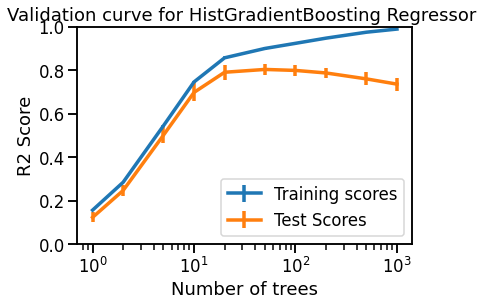

In [34]:
import matplotlib.pyplot as plt

plt.errorbar(
    param_range,
    train_scores_hist.mean(axis=1),
    yerr=train_scores_hist.std(axis=1),
    label="Training scores",
)
plt.errorbar(
    param_range,
    test_scores_hist.mean(axis=1),
    yerr=test_scores_hist.std(axis=1),
    label="Test Scores",
)
plt.legend()
plt.xscale("log")
plt.xlabel("Number of trees")
plt.ylabel("R2 Score")
plt.ylim([0, 1])
_ = plt.title("Validation curve for HistGradientBoosting Regressor ")